In [1]:
###reference:
    ###https://towardsdatascience.com/machine-learning-with-the-titanic-dataset-7f6909e58280



def concat_df(train_data,test_data):
    return pd.concat([train_data,test_data],sort=True).reset_index(drop=True)

def divide_df(all_data):
    return all_data.loc[:890],all_data.loc[891:].drop(['Survived'],axis=1)

In [2]:
import pandas as pd

train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

###JHU not necessary code???
###df_all=concat_df(train_data,test_data)

###JHU not necessary code???
###dfs=[train_data,test_data]

In [3]:
print("train_data_contains: "+str(len(train_data))+" row and "+str(len(train_data.columns))+" columns")
print("test_data_contains: "+str(len(test_data))+" row and "+str(len(test_data.columns))+" columns")

train_data_contains: 891 row and 12 columns
test_data_contains: 418 row and 11 columns


In [4]:
###JHU use simple code to do the same thing to avoid potential errors
###JHU and focus on your analysical logical, to do an exploratory aalysis
###JHU not just to follow they footsetps. logical

print("train_data.shape")
display(train_data.shape)

print("test_data.shape")
display(test_data.shape)

train_data.shape


(891, 12)

test_data.shape


(418, 11)

In [5]:
print("first_3_row_of_train_data")
display(train_data.head(3))
print("first_3_row_of_test_data")
display(test_data.head(3))

first_3_row_of_train_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


first_3_row_of_test_data


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [6]:
###JHU first we take a look at our data, df.shape and then
###JHU we trying to fillin the nulls, data preparing process


print("missing_values_in_train_data")
display(train_data.isnull().sum())
print("missing_value_in_test_data")
display(test_data.isnull().sum())

missing_values_in_train_data


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

missing_value_in_test_data


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
df_all=concat_df(train_data,test_data)

In [8]:
####2 data cleansing Age

In [9]:
print("missing_age_values_in_total_data_set: "+str(df_all['Age'].isnull().sum()))
print("missing_percentage: "+str(round(df_all['Age'].isnull().sum()/len(df_all)*100.0))+" %")

missing_age_values_in_total_data_set: 263
missing_percentage: 20 %


<AxesSubplot:ylabel='Frequency'>

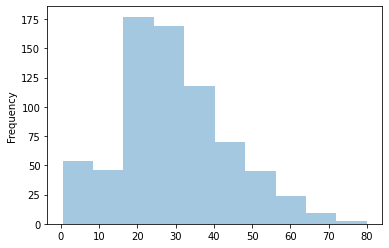

In [10]:
###JHU
import seaborn as sb

train_data['Age'].plot.hist(alpha=0.4)

###JHU we can see a not a normal distribution chart, since we lost many Age
###JHU does that affect our job? should we fillin more young aged data???

<AxesSubplot:xlabel='Age'>

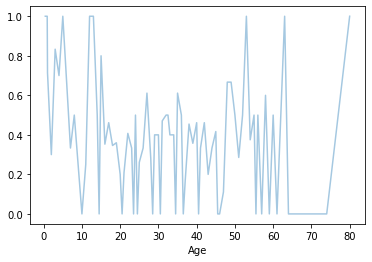

In [11]:
###JHU delete this cell

train_data[['Age','Survived']].groupby('Age')['Survived'].mean().plot(kind='line',alpha=0.4)

###JHU so we should group Age into several categories!!!

#df_all[['Deck','Survived']].groupby('Deck')['Survived'].mean().plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

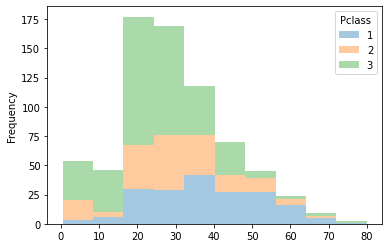

In [12]:
###JHU
train_data.pivot(columns='Pclass').Age.plot(kind='hist',stacked=True,alpha=0.4)

Pclass
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

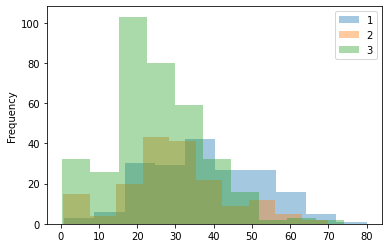

In [13]:
###JHU
train_data.groupby(['Pclass'])['Age'].plot.hist(alpha=0.4,legend=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

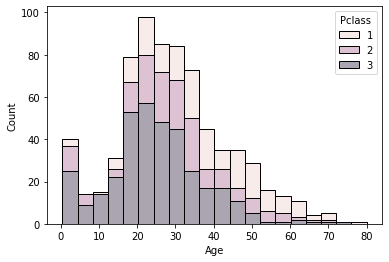

In [14]:
###JHU

sb.histplot(data=train_data,x="Age",hue="Pclass",multiple="stack",alpha=0.4)

In [15]:
print('median_for_Age_seperated_by_Pclass:')
display(train_data.groupby('Pclass')['Age'].median())
print('median_for_Age_seperated_by_Pclass_and_Sex:')
display(train_data.groupby(['Pclass','Sex'])['Age'].median())
print('bumber_of_cases:')
display(train_data.groupby(['Pclass','Sex'])['Age'].count())

median_for_Age_seperated_by_Pclass:


Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

median_for_Age_seperated_by_Pclass_and_Sex:


Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

bumber_of_cases:


Pclass  Sex   
1       female     85
        male      101
2       female     74
        male       99
3       female    102
        male      253
Name: Age, dtype: int64

In [16]:
#replace the missing value with the medians of each group
df_all['Age']=df_all.groupby(['Pclass','Sex'])['Age'].apply(lambda x:x.fillna(x.median()))
df_all

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,25.0,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,25.0,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


In [17]:
####2 data cleansing Fare

In [18]:
df_all.loc[df_all['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [19]:
#loc cases which are similiar to Mr.Thomas and use the median of fare to replace the missing for his data set
mr_thomas=df_all.loc[(df_all['Pclass']==3)&(df_all['SibSp']==0)&(df_all['Embarked']=='S')]['Fare'].median()
print(mr_thomas)
df_all.loc[df_all['Fare'].isnull(),'Fare']=mr_thomas

7.925


In [20]:
####2 data cleansing Cabin

In [21]:
display(train_data['Cabin'].unique())
print('there_are '+str(train_data['Cabin'].nunique())+' different_values_for_Cabin_and '+str(train_data['Cabin'].isnull().sum())+' cases_are_missing')

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

there_are 147 different_values_for_Cabin_and 687 cases_are_missing


1014    M
642     M
867     A
197     M
1000    F
406     M
494     M
118     B
1305    C
1288    B
Name: Deck, dtype: object


Text(0.5, 0.98, 'Survival_rates_for_different_cabines')

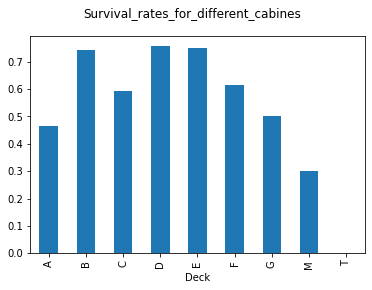

In [22]:
#keep all first letters of Cabin in new variable and use "M" for each missing
df_all['Deck']=df_all['Cabin'].apply(lambda s:s[0] if pd.notnull(s) else 'M')

print(df_all['Deck'].sample(10))

import matplotlib.pyplot as pl

df_all[['Deck','Survived']].groupby('Deck')['Survived'].mean().plot(kind='bar')
pl.suptitle('Survival_rates_for_different_cabines')

<AxesSubplot:xlabel='Deck'>

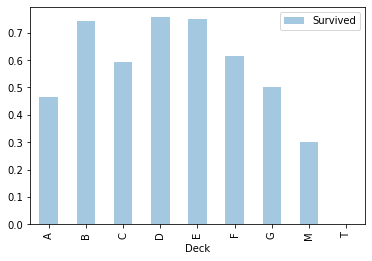

In [23]:
###JHU

df_all.groupby('Deck')['Survived'].mean().plot(kind='bar',alpha=0.4,legend=True)

In [24]:
idx=df_all[df_all['Deck']=='T'].index
df_all.loc[idx,'Deck']='A'

###JHU i think the upper two lines are not necessary

df_all['Deck']=df_all['Deck'].replace(['A','B','C'],'ABC')
df_all['Deck']=df_all['Deck'].replace(['D','E'],'DE')
df_all['Deck']=df_all['Deck'].replace(['F','G'],'FG')

df_all['Deck'].value_counts()

M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

In [25]:
####2 data cleansing Embarked

In [26]:
df_all.loc[df_all['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,ABC
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,ABC


In [27]:
#check for passengers who were in passenger class 1, on deck abc and paid 80 or less for the tickets
df_all.loc[(df_all['Pclass']==1)&(df_all['Fare']<=80)&(df_all['Deck']=='ABC')]['Embarked'].value_counts()

S    50
C    42
Name: Embarked, dtype: int64

In [28]:
df_all.loc[df_all['Embarked'].isnull(),'Embarked']='S'

In [29]:
####2 data cleansing Conclusion

In [30]:
print("missing_in_all_data")
display(df_all.isnull().sum())

missing_in_all_data


Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Deck              0
dtype: int64

In [31]:
print("missing_in_train_data")
display(train_data.isnull().sum())

###JHU why still keeps null Age values in train_data, since we have replaced
###median Age value by Pclass and Sex in df_all???

missing_in_train_data


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
####3 feature engineering Binning

<AxesSubplot:>

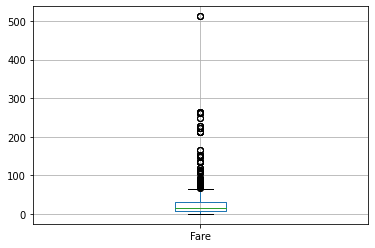

In [33]:
df_all.boxplot(column=['Fare'])###,figsize=(15,7))

<AxesSubplot:xlabel='Fare', ylabel='Count'>

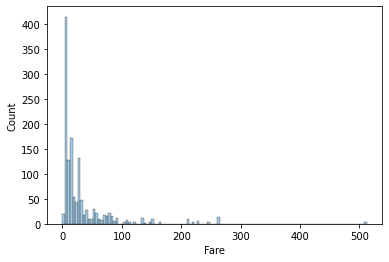

In [34]:
###JHU

sb.histplot(data=df_all,x="Fare",alpha=0.4)

<AxesSubplot:>

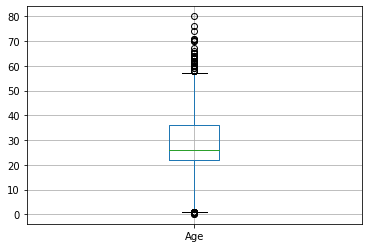

In [35]:
df_all.boxplot(column=['Age'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

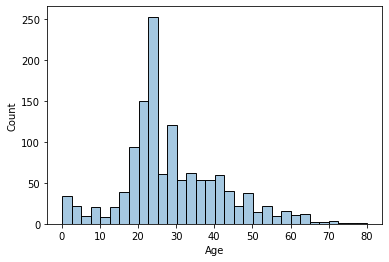

In [36]:
###JHU

sb.histplot(data=df_all,x="Age",alpha=0.4)

In [37]:
###Benedikt Droste
###As you can see, there are outliers for both Age and Fare. 
###The range of values is much higher for Fare compared to Age.
###We will cut the istribution into pieces so that the outliers do not 
###irritate our algorithm. For Fare we will assign the same number of cases 
###to each category and for Age we will build the categories based on the
###values of the variable. This is also the difference between .cut and .qcut.
###With .cut, the bins are formed based on the values of the variable, 
###regardless of how many cases fall into a category. With .qcut we decompose 
###a distribution so that there are the same number of cases in each category.

###JHU ??? it could be the salling strategy which caused the Fare distribution
###JHU ??? they plaaned to sell ticket at all price range to cover the cost 
###JHU ??? but the market demand was not as they expected, so they sell low 
###JHU ??? priced ticket to young people in last minutes.

###df_all['Fare']=pd.qcut(df_all['Fare'],5)#### we must run this first to get
###the labels range then use labels parameter to distribute the bins

###JHU
df_all['Fare']=pd.qcut(df_all['Fare'],5,labels=["<7.8","<10.5","<21.5","<41.5","<512.3"])

###JHU
df_all['Age']=pd.cut(df_all['Age'],5,labels=["<16","<32","<48","<64","<80"])

print("For_Age,_each_category_has_a_different_number_of_cases:")
df_all['Age'].value_counts()

For_Age,_each_category_has_a_different_number_of_cases:


<32    748
<48    308
<16    134
<64    106
<80     13
Name: Age, dtype: int64

In [38]:
print("For_Fare,_each_category_has_nearly_a_same_number_of_cases:")
df_all['Fare'].value_counts()

For_Fare,_each_category_has_nearly_a_same_number_of_cases:


<7.8      275
<41.5     265
<512.3    259
<10.5     255
<21.5     255
Name: Fare, dtype: int64

In [39]:
###JHU
df_all[['Age','Survived']].sample(5)

,Age,Survived
1176,<48,NaN
691,<16,1.0
1184,<64,NaN
80,<32,0.0
456,<80,0.0


In [40]:
df_all[['Age','Survived']].groupby('Age')['Survived'].mean()

Age
<16    0.550000
<32    0.336714
<48    0.412844
<64    0.434783
<80    0.090909
Name: Survived, dtype: float64

In [41]:
df_all[['Fare','Survived']].groupby('Fare')['Survived'].mean()

Fare
<7.8      0.217877
<10.5     0.201087
<21.5     0.426901
<41.5     0.443243
<512.3    0.645349
Name: Survived, dtype: float64

Text(0.5, 0.98, 'Survival_rates_for_Age_categories')

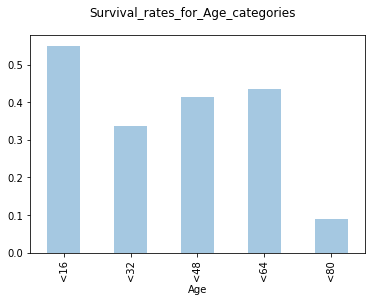

In [42]:
df_all[['Age','Survived']].groupby('Age')['Survived'].mean().plot(kind='bar',alpha=0.4)
pl.suptitle('Survival_rates_for_Age_categories')

Text(0.5, 0.98, 'Survivel_rate_for_Fare_categories')

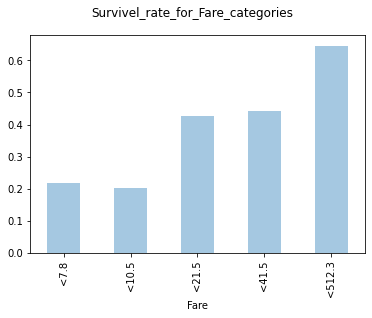

In [43]:
df_all[['Fare','Survived']].groupby('Fare')['Survived'].mean().plot(kind='bar',alpha=0.4)
pl.suptitle('Survivel_rate_for_Fare_categories')

In [44]:
####3 Creat new features out of existing variables Family Size

###JHU why we do it this way

<AxesSubplot:ylabel='Frequency'>

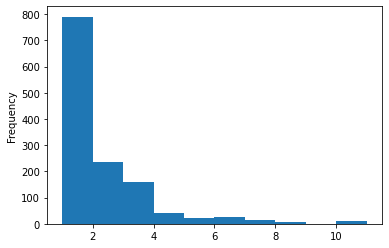

In [45]:
df_all['Family_size']=df_all['SibSp']+df_all['Parch']+1
df_all['Family_size'].plot.hist()

In [46]:
df_all['Family_size_bin']=df_all['Family_size'].map(lambda s:1 if s==1 else(2 if s==2 else(3 if 3<=s<=4 else(4 if s>=5 else 0))))

In [47]:
df_all['Family_size_bin'].value_counts()

1    790
2    235
3    202
4     82
Name: Family_size_bin, dtype: int64

<AxesSubplot:xlabel='Family_size_bin'>

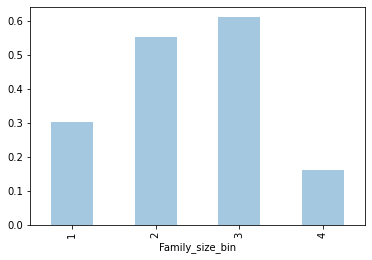

In [48]:
df_all[['Family_size_bin','Survived']].groupby('Family_size_bin')['Survived'].mean().plot(kind='bar',alpha=0.4)

In [49]:
####3 Creat new features out of existing variables Tickets


In [50]:
df_all['Ticket_frequency']=df_all.groupby('Ticket')['Ticket'].transform('count')


###JHU .transform('count') and what why 'count'
###so 1 means most ticket sold category or something??

In [51]:
df_all[['Ticket_frequency','Survived']].groupby('Ticket_frequency').mean()

,Survived
Ticket_frequency,
1,0.270270
2,0.513812
3,0.653465
4,0.727273
5,0.333333
6,0.210526
7,0.208333
8,0.384615
11,0.000000


<AxesSubplot:xlabel='Ticket_frequency'>

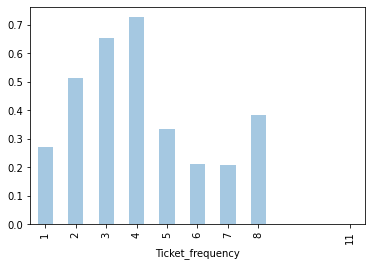

In [52]:
df_all[['Ticket_frequency','Survived']].groupby('Ticket_frequency')['Survived'].mean().plot(kind='bar',alpha=0.4)

In [53]:
####3 Creat new features out of existing variables Title


In [54]:
###JHU

df_all.sample(15)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,Family_size,Family_size_bin,Ticket_frequency
59,<16,NaN,S,<512.3,"Goodwin, Master. William Frederick",2,60,3,male,5,0.0,CA 2144,M,8,4,8
1182,<32,NaN,Q,<7.8,"Daly, Miss. Margaret Marcella Maggie""""",0,1183,3,female,0,NaN,382650,M,1,1,1
205,<16,G6,S,<10.5,"Strom, Miss. Telma Matilda",1,206,3,female,0,0.0,347054,FG,2,2,2
310,<32,C54,C,<512.3,"Hays, Miss. Margaret Bechstein",0,311,1,female,0,1.0,11767,ABC,1,1,3
1042,<32,NaN,C,<10.5,"Matinoff, Mr. Nicola",0,1043,3,male,0,NaN,349255,M,1,1,1
799,<32,NaN,S,<41.5,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",1,800,3,female,1,0.0,345773,M,3,3,3
110,<48,C110,S,<512.3,"Porter, Mr. Walter Chamberlain",0,111,1,male,0,0.0,110465,ABC,1,1,2
822,<48,NaN,S,<7.8,"Reuchlin, Jonkheer. John George",0,823,1,male,0,0.0,19972,M,1,1,1
313,<32,NaN,S,<10.5,"Hendekovic, Mr. Ignjac",0,314,3,male,0,0.0,349243,M,1,1,1
542,<16,NaN,S,<41.5,"Andersson, Miss. Sigrid Elisabeth",2,543,3,female,4,0.0,347082,M,7,4,7


In [55]:
df_all['Title']=df_all['Name'].str.split(', ',expand=True)[1].str.split('.',expand=True)[0]
df_all['Is_married']=0
df_all['Is_married'].loc[df_all['Title']=='Mrs']=1


###JHU is that a joke or something? it seems many codes are reduandant or just
###JHU be there to help the reader learning to code in a proper way??

df_all['Title'].nunique()

/home/marry/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


18

In [56]:
###JHU

df_all['Title'].unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [57]:
title_names=(df_all['Title'].value_counts()<10)

df_all['Title']=df_all['Title'].apply(lambda x:'Mice' if title_names.loc[x]==True else x)

df_all.groupby('Title')['Title'].count()

Title
Master     61
Mice       34
Miss      260
Mr        757
Mrs       197
Name: Title, dtype: int64

<AxesSubplot:xlabel='Title'>

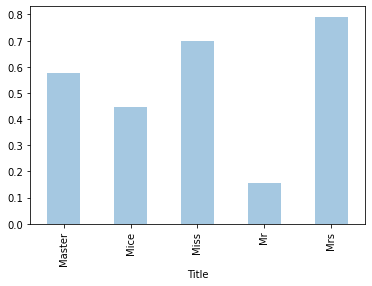

In [58]:
###JHU
df_all[['Title','Survived']].groupby('Title')['Survived'].mean().plot(kind='bar',alpha=0.4)

In [59]:
####3 Creat new features out of existing variables Survival Rates


In [60]:
import string

def extract_surname(data):
    families=[]
    for i in range(len(data)):
        name=data.iloc[i]
        if '(' in name:
            name_no_bracket=name.split('(')[0]
        else:
            name_no_bracket=name
        family=name_no_bracket.split(',')[0]
        title=name_no_bracket.split(',')[1].strip().split(' ')[0]
        for c in string.punctuation:
            family=family.replace(c,'').strip()
        families.append(family)
    return families

df_all['Family']=extract_surname(df_all['Name'])

In [61]:
df_all['Family'].nunique()

875

In [62]:
df_all[['Title','Survived','Family_size']].groupby('Title').mean()

###JHU THINK & PRACTICE

,Survived,Family_size
Title,,
Master,0.575000,4.426230
Mice,0.444444,1.441176
Miss,0.697802,2.169231
Mr,0.156673,1.442536
Mrs,0.792000,2.492386


Survival_rates_grouped_by_families_of_women_in_dataset:


<AxesSubplot:ylabel='Frequency'>

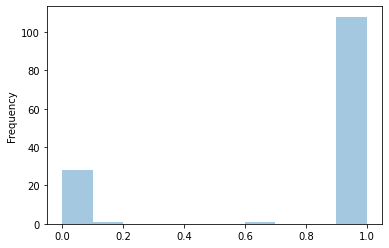

In [63]:
print("Survival_rates_grouped_by_families_of_women_in_dataset:")
df_all.loc[(df_all['Sex']=='female')&(df_all['Family_size']>1)].groupby('Family')['Survived'].mean().plot.hist(alpha=0.4)

###JHU how to read this chart, 0 to 1 on x axes and 0 to 100 on y axes???
###JHU and whats the point doing this


<AxesSubplot:ylabel='Frequency'>

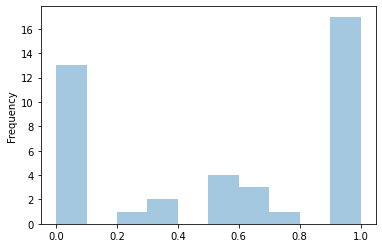

In [64]:
master_families=df_all[df_all['Title']=='Master']['Family'].tolist()
df_all.loc[df_all['Family'].isin(master_families)].groupby('Family')['Survived'].mean().plot.hist(alpha=0.4)

###JHU how to read this chart, 0 to 1 on x axes and 0 to 100 on y axes???


In [65]:
#Create variables with the survival rate of the women and masters

women_rate=df_all.loc[(df_all['Sex']=='female')&(df_all['Family_size']>1)].groupby('Family')['Survived'].mean()
master_rate=df_all.loc[df_all['Family'].isin(master_families)].groupby('Family')['Survived'].mean()

#Combine two series
combined_rate=women_rate.append(master_rate)

#It is posible that a woman has the family as a master and vice versa, so duplicates have to been dropped
combined_rate_df=combined_rate.to_frame().reset_index().rename(columns={'Survived':'Survival_quota'}).drop_duplicates(subset='Family')

#Merge the new dataframe
df_all=pd.merge(df_all,combined_rate_df,how='left')

In [66]:
#We have calculated a survival rate for only a part of the cases, the others 
#we set to 0 in the dummy variable

df_all['Survival_quota_NA']=1
df_all.loc[df_all['Survival_quota'].isnull(),'Survival_quota_NA']=0
df_all['Survival_quota']=df_all['Survival_quota'].fillna(0)


In [67]:
####3.3 Label and One Hot Encoding


In [68]:
###JHU
from sklearn import preprocessing

non_numeric_features=['Embarked','Sex','Title','Age','Fare','Deck']

for feature in non_numeric_features:
    df_all[feature]=preprocessing.LabelEncoder().fit_transform(df_all[feature])
    
cat_features=['Pclass','Sex','Embarked','Title','Deck','Family_size_bin','Age','Fare']
    
encoded_features=[]

for feature in cat_features:
    encoded_feat=preprocessing.OneHotEncoder().fit_transform(df_all[feature].values.reshape(-1,1)).toarray()
    n=df_all[feature].nunique()
    cols=['{}_{}'.format(feature,n) for n in range(1,n+1)]
    encoded_df=pd.DataFrame(encoded_feat,columns=cols)
    encoded_df.index=df_all.index
    encoded_features.append(encoded_df)


df_all=pd.concat([df_all,*encoded_features],axis=1)

In [69]:
df_train,df_test=divide_df(df_all)

In [70]:
####Modeling and prediction


In [71]:
#Defined columns which can be dropped for the modeling part because we 
#created new lable and one hot encoded variants out of them

drop_cols=['Embarked','Family','Family_size','Survived','Family_size_bin',
           'Deck','Age','Name','Parch','PassengerId','Pclass','Sex','SibSp',
           'Title','Ticket','Cabin']

drop_cols_2=['Embarked','Family','Family_size','Family_size_bin','Deck','Fare',
            'Name','Parch','PassengerId','Pclass','Sex','SibSp','Title',
             'Ticket','Cabin']


In [72]:
#setting up a random forest classifier
#standardization of variables

###JHU
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
###JHU from sklearn.preprocessing import StandardScaler

x=preprocessing.StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y=df_train['Survived'].values

x_test=preprocessing.StandardScaler().fit_transform(df_test.drop(columns=drop_cols_2))

#creating train, test splits
x_train,x_test1,y_train,y_test1=train_test_split(x,y,test_size=0.25,random_state=42)

#defining model parameters
model=RandomForestClassifier(criterion='gini',
                                          n_estimators=1750,
                                          max_depth=7,
                                          min_samples_split=6,
                                          min_samples_leaf=6,
                                          max_features="auto",
                                          oob_score=True,
                                          random_state=42,
                                          n_jobs=-1,
                                          verbose=1)

model.fit(x_train,y_train)
predictions=model.predict(x_test)
print(model.score(x_test1,y_test1))
output=pd.DataFrame({'PassengerId':test_data.PassengerId,'Survived':predictions})
output['Survived']=output['Survived'].astype(int)
output.to_csv('2020_00_09_titanic_jjj.csv',index=False)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 444 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 794 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 1244 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    4.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 1750 out of 1750 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent worker

0.874439461883408


[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done 1750 out of 1750 | elapsed:    0.4s finished
